In [179]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib as plt
import matplotlib.pyplot
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [180]:
pd.set_option('display.max_rows', 500)
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
df = df[df.poutcome != 'nonexistent']
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,unknown,no,yes,no,telephone,oct,tue,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,999,1,failure,-0.1,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,yes
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no


In [181]:
df.loc[df['poutcome'] == 'failure', 'poutcome'] = 0
df.loc[df['poutcome'] == 'success', 'poutcome'] = 1
features = ['cons.conf.idx', 'cons.price.idx']
df['poutcome'] = df['poutcome'].astype(int)
x = df[features]
y = df['poutcome']

In [204]:
from imblearn.over_sampling import RandomOverSampler
ro = RandomOverSampler()
x_new, y_new = ro.fit_resample(x, y)
df2 = pd.DataFrame(y_new)
print(x_new, y_new)

[[-40.4    93.798]
 [-40.4    93.798]
 [-42.     93.2  ]
 ...
 [-31.4    92.201]
 [-40.8    92.963]
 [-40.8    92.963]] [0 0 0 ... 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [195]:
X_train, X_test, y_train, y_test = train_test_split( 
          x_new, y_new, test_size = 0.3)

In [196]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [197]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.771551724137931


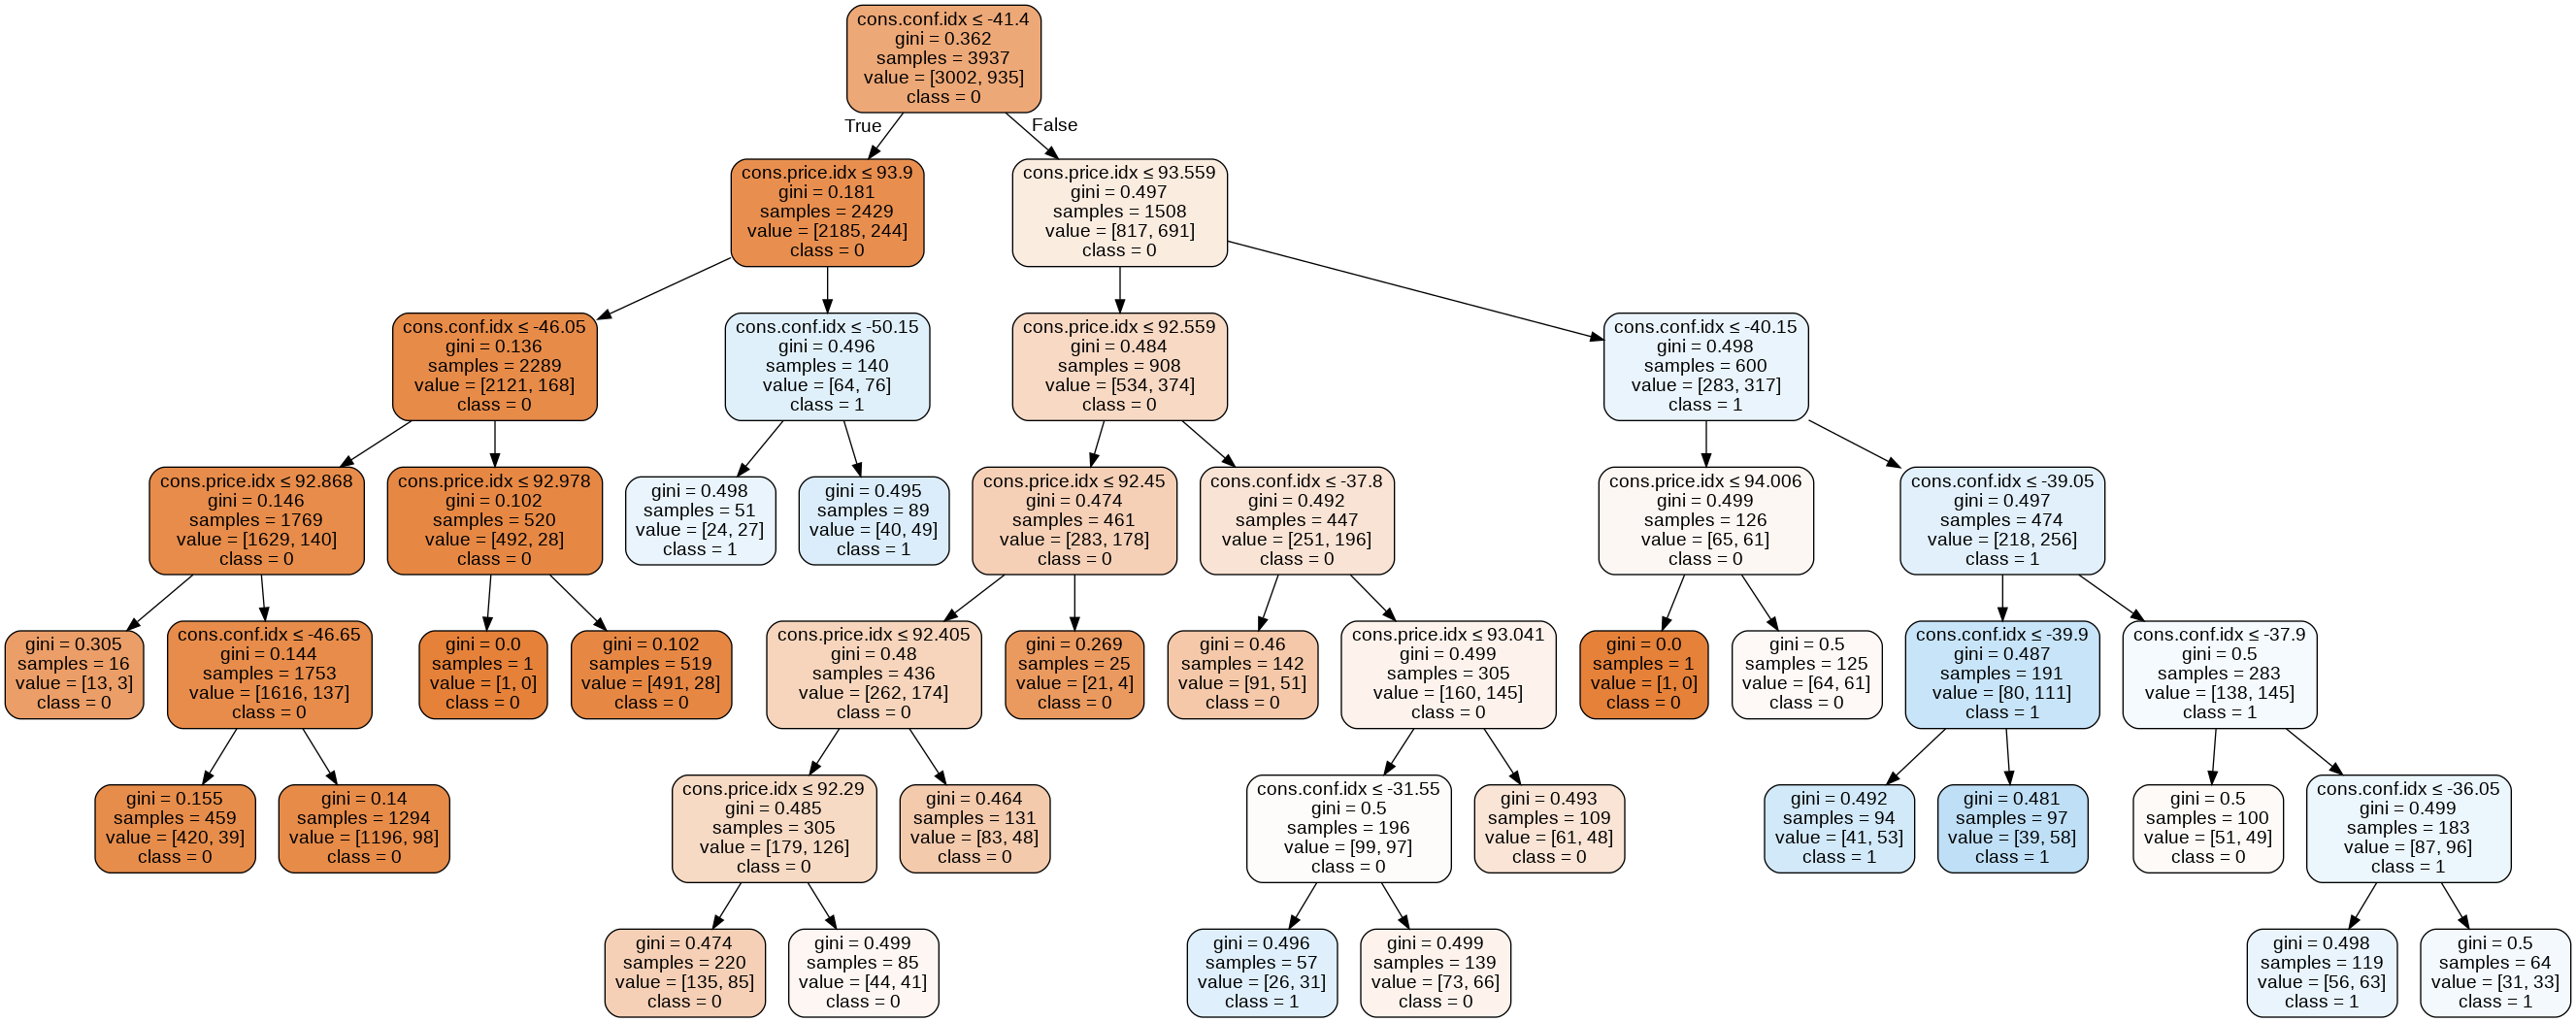

In [172]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Index.png')
Image(graph.create_png())

In [198]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 902,  336],
       [ 247, 1067]])

In [199]:
pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.785030,0.760513,0.771552,0.772772,0.772407
recall,0.728595,0.812024,0.771552,0.770309,0.771552
f1-score,0.755760,0.785425,0.771552,0.770593,0.771034
support,1238.000000,1314.000000,0.771552,2552.000000,2552.000000


In [200]:
clf.feature_importances_

array([0.78054453, 0.21945547])